In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [2]:
# df = pd.read_csv('hotel_bookings.csv')
df = pd.read_excel('hotel_revenue_historical_full.xlsx')

## Data Analysis and Data Cleaning

head function display five row by default

In [3]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2018-05-06
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2018-04-22


Display how many column in a dataset

In [4]:
df.shape

(21996, 32)

Display all the column in the dataset

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
# this command are used to see that reservation_status_date 
date =pd.to_datetime(df['reservation_status_date'])
# this command are used to change the date format
date.dt.strftime('%d-%m-%y')

0        06-05-18
1        22-04-18
2        23-06-18
3        11-05-18
4        29-05-18
           ...   
21991    27-12-18
21992    27-12-18
21993    29-12-18
21994    30-12-18
21995    30-12-18
Name: reservation_status_date, Length: 21996, dtype: object

this command will  see all the object in data

In [7]:
df.describe( include=object)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,21996,21996,21996,21863,21996,21996,21996,21996,21996,21996,21996
unique,2,6,5,98,7,5,9,11,3,4,3
top,City Hotel,September,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,13682,5114,17235,13307,6165,17741,17720,14441,18325,11431,13854


checked that how many row are unique in to  hotel_data_sheet

In [9]:
for col in df.describe(include=object):
        print(col)
        print(df[col].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December']
meal
['BB' 'HB' 'FB' 'Undefined' 'SC']
country
['PRT' 'IRL' 'ESP' 'DEU' 'CN' 'ITA' nan 'GBR' 'BEL' 'RUS' 'FRA' 'MOZ'
 'IRN' 'BRA' 'KOR' 'AGO' 'USA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'CHE' 'GRC'
 'NLD' 'DNK' 'SWE' 'AUS' 'EST' 'CZE' 'FIN' 'BWA' 'LUX' 'SVN' 'ALB' 'IND'
 'CHN' 'MEX' 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU'
 'TUR' 'ZAF' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'CRI' 'NZL' 'HUN' 'IDN'
 'HRV' 'KAZ' 'THA' 'COL' 'DOM' 'MKD' 'MYS' 'NGA' 'VEN' 'GIB' 'ARM' 'JPN'
 'LKA' 'TUN' 'STP' 'BGR' 'TWN' 'AZE' 'LBN' 'SVK' 'CMR' 'SGP' 'SEN' 'PER'
 'EGY' 'SAU' 'KNA' 'JOR' 'KWT' 'ETH' 'PHL' 'LIE' 'MMR' 'IRQ' 'PAN' 'GEO'
 'TMP' 'MUS' 'ECU']
market_segment
['Online TA' 'Offline TA/TO' 'Direct' 'Corporate' 'Groups' 'Complementary'
 'Undefined']
distribution_channel
['TA/TO' 'Direct' 'Corporate' 'Undefined' 'GDS']
reserved_room_type
['A' 'D' 'E' 'G' 'F' 'H' 'C' 'L' 'B']
assi

In [10]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             133
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              3099
company                           20691


this command will be use to delete two rows in database

In [11]:
df.drop(['agent','company'], axis=1 ,inplace=True)
df.dropna( )

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,A,0,No Deposit,0,Transient,82.00,0,1,Canceled,2018-05-06
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,D,0,No Deposit,0,Transient,105.50,0,0,Canceled,2018-04-22
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,E,0,No Deposit,0,Transient,123.00,0,0,Canceled,2018-06-23
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,E,0,No Deposit,0,Transient,107.00,0,2,Canceled,2018-05-11
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,E,0,No Deposit,0,Transient,108.30,0,2,Canceled,2018-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21991,City Hotel,1,24,2018,December,53,27,2,1,2,...,D,0,No Deposit,0,Transient,58.00,0,0,No-Show,2018-12-27
21992,City Hotel,1,1,2018,December,53,27,2,4,2,...,E,0,No Deposit,0,Transient,147.67,0,0,No-Show,2018-12-27
21993,City Hotel,1,66,2018,December,53,28,0,5,2,...,F,0,No Deposit,0,Transient,170.90,0,1,No-Show,2018-12-29
21994,City Hotel,1,54,2018,December,53,30,1,4,2,...,D,0,No Deposit,0,Contract,118.20,0,1,No-Show,2018-12-30


<Axes: >

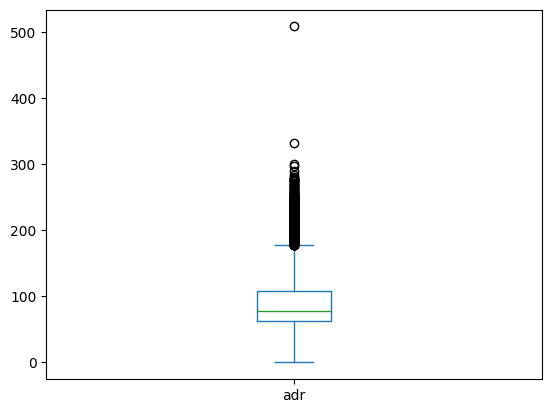

In [12]:
df['adr'].plot(kind='box')

In [13]:
# remove adr
df= df[df['adr']<5000]

<Axes: >

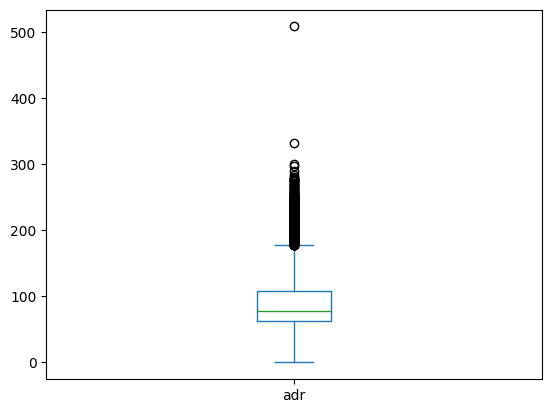

In [14]:
df['adr'].plot(kind='box')

# Data Analysis and Visualizations

is_canceled
0    0.629842
1    0.370158
Name: proportion, dtype: float64


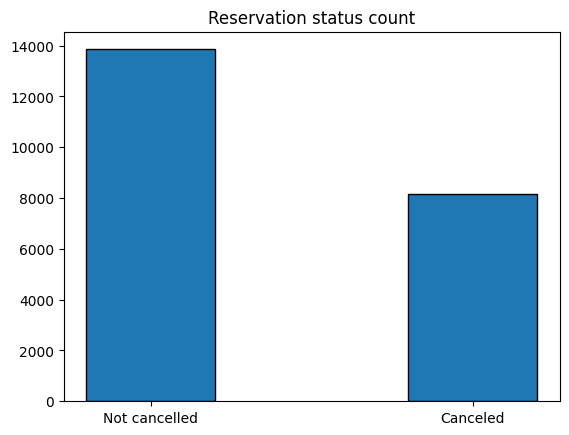

In [15]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)
# plt.figure(Figsize = (5,4))
plt.title('Reservation status count')
# plot a bar plot and add title using set_title 
plt.bar(['Not cancelled' , 'Canceled'],df['is_canceled'].value_counts(),edgecolor='k',width=0.4)
plt.show()

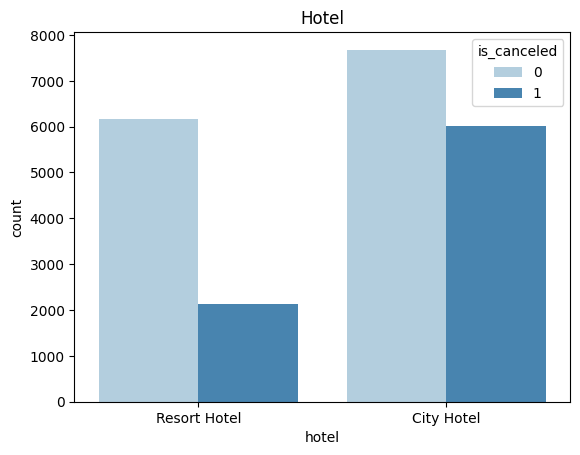

In [16]:
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues').set( 
    title="Hotel") 

<Axes: xlabel='is_canceled', ylabel='hotel'>

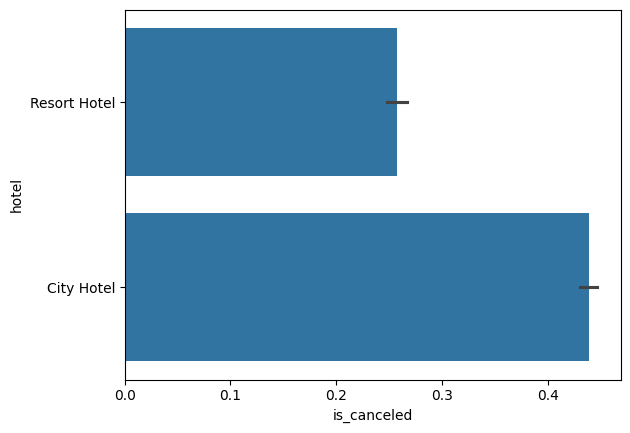

In [17]:
sns.barplot(data=df , x= df['is_canceled'] , y=df['hotel'] )

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

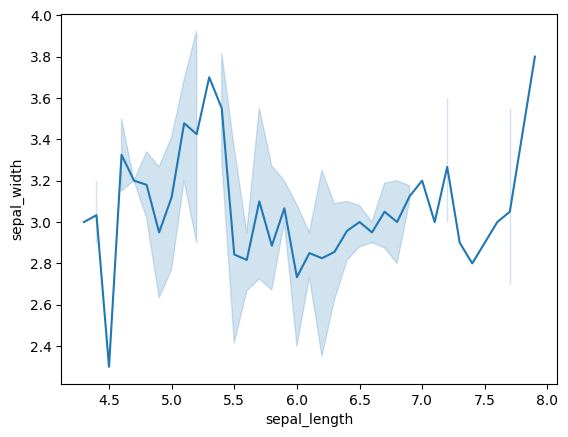

In [18]:
# loading dataset 
data = sns.load_dataset("iris") 

# draw lineplot 
sns.lineplot(x="sepal_length", y="sepal_width", data=data)